In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [2]:
file_path = Path("Output/signals_AMC.csv")
df_amc = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_amc.sort_index(inplace=True)
df_amc = df_amc[['Portfolio Minute Returns', 'Stock Minute Returns']]
df_amc.columns = ["AMC Strat", "AMC Stock"]

In [3]:
file_path = Path("Output/signals_BB.csv")
df_bb = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_bb.sort_index(inplace=True)
df_bb = df_bb[['Portfolio Minute Returns', 'Stock Minute Returns']]
df_bb.columns = ["BB Strat", "BB Stock"]

In [4]:
file_path = Path("Output/signals_BBBY.csv")
df_bbby = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_bbby.sort_index(inplace=True)
df_bbby = df_bbby[['Portfolio Minute Returns', 'Stock Minute Returns']]
df_bbby.columns = ["BBBY Strat", "BBBY Stock"]

In [5]:
file_path = Path("Output/signals_GME.csv")
df_gme = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_gme.sort_index(inplace=True)
df_gme = df_gme[['Portfolio Minute Returns', 'Stock Minute Returns']]
df_gme.columns = ["GME Strat", "GME Stock"]

In [6]:
file_path = Path("Output/signals_NOK.csv")
df_nok = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_nok.sort_index(inplace=True)
df_nok = df_nok[['Portfolio Minute Returns', 'Stock Minute Returns']]
df_nok.columns = ["NOK Strat", "NOK Stock"]

In [7]:
df_data = df_amc.join(df_bb).join(df_bbby).join(df_gme).join(df_nok)
df_data.dropna(inplace=True)

In [8]:
df_data["AMC Vol"]  = df_data["AMC Strat"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data["BB Vol"]   = df_data["BB Strat"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data["BBBY Vol"] = df_data["BBBY Strat"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data["GME Vol"]  = df_data["GME Strat"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data["NOK Vol"]  = df_data["NOK Strat"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data.dropna(inplace=True)

In [9]:
df_data["AMC InvVol"]  = 1 / df_data["AMC Vol"]
df_data["BB InvVol"]   = 1 / df_data["BB Vol"]
df_data["BBBY InvVol"] = 1 / df_data["BBBY Vol"]
df_data["GME InvVol"]  = 1 / df_data["GME Vol"]
df_data["NOK InvVol"]  = 1 / df_data["NOK Vol"]

In [10]:
df_data["Sum of InvVol"] = df_data['AMC InvVol'] + df_data['BB InvVol'] +  df_data['BBBY InvVol'] +  df_data['GME InvVol'] +  df_data['NOK InvVol']

In [11]:
portfolio_df = pd.DataFrame({'AMC Alloc': df_data['AMC InvVol']/df_data['Sum of InvVol'],
                             'BB Alloc': df_data['BB InvVol']/df_data['Sum of InvVol'],
                             'BBBY Alloc': df_data['BBBY InvVol']/df_data['Sum of InvVol'],
                             'GME Alloc': df_data['GME InvVol']/df_data['Sum of InvVol'],
                             'NOK Alloc': df_data['NOK InvVol']/df_data['Sum of InvVol'], }, index=df_data.index)

In [12]:
portfolio_df['AMC Return']  = df_data['AMC Strat'] * portfolio_df['AMC Alloc']
portfolio_df['BB Return']   = df_data['BB Strat'] * portfolio_df['BB Alloc']
portfolio_df['BBBY Return'] = df_data['BBBY Strat'] * portfolio_df['BBBY Alloc']
portfolio_df['GME Return']  = df_data['GME Strat'] * portfolio_df['GME Alloc']
portfolio_df['NOK Return']  = df_data['NOK Strat'] * portfolio_df['NOK Alloc']

In [13]:
portfolio_df['Portfolio Return'] = portfolio_df['AMC Return'] + portfolio_df['BB Return'] + portfolio_df['BBBY Return'] + portfolio_df['GME Return'] + portfolio_df['NOK Return']

In [14]:
portfolio_df['Portfolio Value'] = ((portfolio_df['Portfolio Return'] + 1).cumprod())*1e6

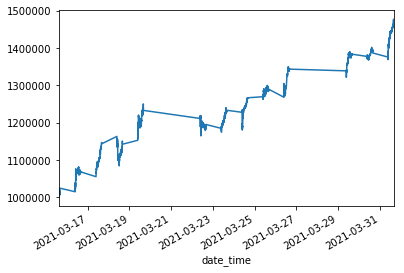

In [15]:
portfolio_df['Portfolio Value'].plot()

In [16]:
ew = (1/5)
portfolio_ew = pd.DataFrame({'AMC Alloc': ew,
                             'BB Alloc': ew,
                             'BBBY Alloc': ew,
                             'GME Alloc': ew,
                             'NOK Alloc': ew, }, index=df_data.index)

In [17]:
portfolio_ew['AMC Return']  = df_data['AMC Stock'] * portfolio_ew['AMC Alloc']
portfolio_ew['BB Return']   = df_data['BB Stock'] * portfolio_ew['BB Alloc']
portfolio_ew['BBBY Return'] = df_data['BBBY Stock'] * portfolio_ew['BBBY Alloc']
portfolio_ew['GME Return']  = df_data['GME Stock'] * portfolio_ew['GME Alloc']
portfolio_ew['NOK Return']  = df_data['NOK Stock'] * portfolio_ew['NOK Alloc']

In [18]:
portfolio_ew['Portfolio Return'] = portfolio_ew['AMC Return'] + portfolio_ew['BB Return'] + portfolio_ew['BBBY Return'] + portfolio_ew['GME Return'] + portfolio_ew['NOK Return']

In [19]:
portfolio_ew['Portfolio Value'] = ((portfolio_ew['Portfolio Return'] + 1).cumprod())*1e6

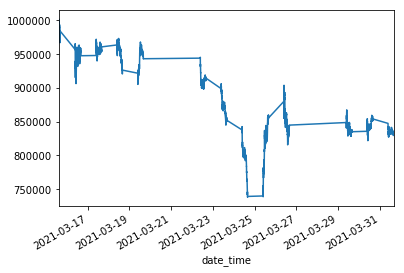

In [20]:
portfolio_ew['Portfolio Value'].plot()

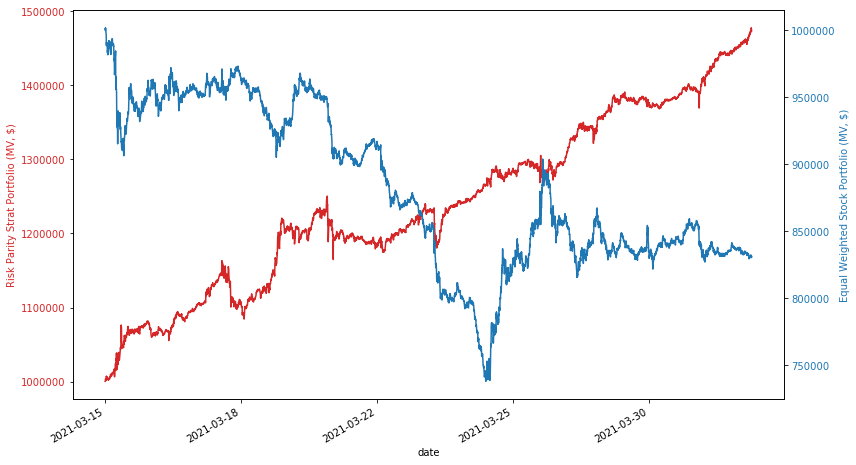

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.dates import bytespdate2num, num2date, date2num
from matplotlib.ticker import Formatter

portfolio_df['num_date'] = date2num(portfolio_df.index)

class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        return num2date(self.dates[ind]).strftime(self.fmt)

formatter = MyFormatter(portfolio_df['num_date'])

fig, ax1 = plt.subplots(figsize=(12,7))

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Risk Parity Strat Portfolio (MV, $)', color=color)
ax1.xaxis.set_major_formatter(formatter)
ax1.plot(np.arange(len(portfolio_df)), portfolio_df['Portfolio Value'], '-', color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Equal Weighted Stock Portfolio (MV, $)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(len(portfolio_ew)), portfolio_ew['Portfolio Value'], '-', color = color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.autofmt_xdate()
plt.show()